# Amazon Reviews Analysis
---
<b>By David Penny<b>

<b>Problem Statement:<b>
- With amazon nearing ½ billion products, users turn to reviews to inform their purchase decisions. The question is how helpful is each review?


<b>Understanding the Problem<b>
- Yelp has an algorithm that classifies reviews as “recommended” or “not-recommended” and is very effective at maintaining an honest review of each establishment.
- Amazon removes reviews it deems unauthentic or that violate its Terms of Use however many “unhelpful” reviews seem to remain. Sellers can also be maliciously attacked when competitors order blatently obvious reviews for another seller, forcing Amazon to automatically shut the seller down.


<b>What is an Unhelpful Review?<b>

Unhelpful reviews can be any combination of the following:
- Too Short.
- Too Long.
- Too complicated to read.
- Too simplistic.
- Overly negative
- Overly positive
- Containing toxic or otherwise strong negative sentiment.
- Falsified or dishonest.

<b>Levels of Analysis<b>
    
While there are many avenues to tackle this problem and different levels of analysis possible. This project will only focus on the first level and if more time exists, pursue the second level.
    
Level 1: Feature Engineering
- Engineer features seen in Table 1 below. Train and test a variety of models to attempt to reach the highest accuracy.
    
Level 2: User Behavior & Product Trust
- www.ReviewMeta.com does this exceptionally well. They scrape each product, its reviews and the metadata from each of the users profile pages, and then determine the following:
    - Check for deleted reviews
    - Reviewer ease
    - Rating trend
    - Unverified purchases
    - Word count comparison
    - Phrase repetition
    - Suspicious reviewers (one-hit wonders, never-verified reviewers, single-day reviewers)
    - Overlapping review history
    - Brand repeats
    - Incentivized reviews
- This creates a exceptionally powerful understanding of not just the trustworthiness of the review, but the trustworthiness of the reviewer.

<b>Goal<b>

- Engineer the correct features in the correct combination to attain the highest possible accuracy at labeling reviews as 'falsified'.

<b>Packages, programs and libraries Required<b>
- textstat
- Java's JDK
- Stanford CoreNLP

<b>Feature Engineering:<b>

Features to Add | Description | Example
------------- | ------------- | -------------
falsified | The label indicating if the review was falsified or not | 1
rating | The star rating the customer rated the product from 1-5 | 3
verified_purchase | Returns wether or not the customer purchased the product. | 1
sentiment | Returns the overall sentiment of the review. | 0
num_words_in_text | Returns the total number of words in the text | 23
num_stopwords| Returns the total number of stop words. | 12
num_words_in_text_no_stop | Returns the total number of words in the text not counting stop words. | 9
num_unique_words | Returns the number of unique words in the text. | 17
mean_word_len| Returns the average word length in the text. | 4
num_chars| Returns the total number of characters. | 251
num_punctuations| Returns the total number of punctuations. | 4
num_scentences_in_text | Returns the total number of scenctences in the text using textstat library. | 5
flesch_ease| Returns the Flesch Reading Ease Score. | 98.11
flesch_kincaid_grade | Returns the Flesch-Kincaid Grade of the given text. This is a grade formula in that a score of 9.3 means that a ninth grader would be able to read the document. | 9.3
automated_readability_index | Returns the ARI (Automated Readability Index) which outputs a number that approximates the grade level needed to comprehend the text. | 6.5
overall_readability_index| Based upon all the above tests, returns the estimated school grade level required to understand the text. | 8.0
total_sentiment | TBD | TBD
toxic_comment_count | TBD | TBD

<b><center>Table 1: Engineerd Features from review_text Column</center><b>

#### Personal Notes

Boost Accuracy By:
- Creating feature total_sentiment_analysis by analyzing the sentiment contained in each scentence - NLP on each scentence and using recurrent neural tensor networks (RNTNs) to determine each scentence sentiment.
- Creating feature toxic_comments_count (toxic+severe_toxic+obscene+threat+insult+identity_hate) - Kaggle Challenge
- <mark>Word embeddings <mark>

Consider:
- Scaling data
- KNN, Decision Trees, Support Vector Machines
- PCA
- Model Evaluation
- HyperParameter Optimization for each
- K-Means, GMM, t-SNE clustering
- Neural Networks - recurrent neural tensor networks (RNTNs)
   

### 1. Data Ingest, Check and Cleanup

 
---

In [ ]:
# Let's start by importing our favorite libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import textstat

In [502]:
# Read in the data.
df = pd.read_csv('data/labeled_amazon_reviews.txt', sep="\t")
df.columns = ["doc_id", "falsified", "rating", "verified_purchase", "product_category", "product_id", "product_title","review_title","review_text"]

In [503]:
# Let's take a peek at the data
df.head(5)
# __label1__ indicates a falsified review and __label2__ indicates a honest review

,doc_id,falsified,rating,verified_purchase,product_category,product_id,product_title,review_title,review_text
0,1,__label1__,4,N,PC,B00008NG7N,"Targus PAUK10U Ultra Mini USB Keypad, Black",useful,"When least you think so, this product will save the day. Just keep it around just in case you need it for something."
1,2,__label1__,4,Y,Wireless,B00LH0Y3NM,Note 3 Battery : Stalion Strength Replacement 3200mAh Li-Ion Battery for Samsung Galaxy Note 3 [24-Month Warranty] with NFC Chip + Google Wallet Capable,New era for batteries,Lithium batteries are something new introduced in the market there average developing cost is relatively high but Stallion doesn't compromise on quality and provides us with the best at a low cost.<br />There are so many in built technical assistants that act like a sensor in their particular forté. The battery keeps my phone charged up and it works at every voltage and a high voltage is never risked.
2,3,__label1__,3,N,Baby,B000I5UZ1Q,"Fisher-Price Papasan Cradle Swing, Starlight",doesn't swing very well.,"I purchased this swing for my baby. She is 6 months now and has pretty much out grown it. It is very loud and doesn't swing very well. It is beautiful though. I love the colors and it has a lot of settings, but I don't think it was worth the money."
3,4,__label1__,4,N,Office Products,B003822IRA,Casio MS-80B Standard Function Desktop Calculator,Great computing!,I was looking for an inexpensive desk calcolatur and here it is. It works and does everything I need. Only issue is that it tilts slightly to one side so when I hit any keys it rocks a little bit. Not a big deal.
4,5,__label1__,4,N,Beauty,B00PWSAXAM,Shine Whitening - Zero Peroxide Teeth Whitening System - No Sensitivity,Only use twice a week,"I only use it twice a week and the results are great. I have used other teeth whitening solutions and most of them, for the same results I would have to use it at least three times a week. Will keep using this because of the potency of the solution and also the technique of the trays, it keeps everything in my teeth, in my mouth."
5,6,__label1__,3,N,Health & Personal Care,B00686HNUK,Tobacco Pipe Stand - Fold-away Portable - Light Weight - For Single Pipe,not sure,I'm not sure what this is supposed to be but I would recommend that you do a little more research into the culture of using pipes if you plan on giving this as a gift or using it yourself.
6,7,__label1__,4,N,Toys,B00NUG865W,ESPN 2-Piece Table Tennis,PING PONG TABLE GREAT FOR YOUTHS AND FAMILY,"Pleased with ping pong table. 11 year old and 13 year old having a blast, plus lots of family entertainment too. Plus better than kids sitting on video games all day. A friend put it together. I do believe that was a challenge, but nothing they could not handle"
7,8,__label1__,4,Y,Beauty,B00QUL8VX6,"Abundant Health 25% Vitamin C Serum with Vitamin E and Hyaluronic Acid for Youthful Looking Skin, 1 fl. oz.",Great vitamin C serum,"Great vitamin C serum... I really like the oil feeling, not too sticky. I used it last week on some of my recent bug bites and it helps heal the skin faster than normal."
8,9,__label1__,4,N,Health & Personal Care,B004YHKVCM,PODS Spring Meadow HE Turbo Laundry Detergent Pacs 77-load Tub,wonderful detergent.,"I've used tide pods laundry detergent for many years,its such a great detergent to use having a nice scent and leaver the cloths smelling fresh."
9,10,__label1__,1,N,Health & Personal Care,B00H4IBD0M,"Sheer TEST, Best Testosterone Booster Supplement for Men with Fenugreek, Science-Based Formula Delivers Visible Results You Can See and Feel, Full 30-Day Cycle",WARNING: do not waste your money on this,"Everybody wants to fall for their promises. But this is a relatively unheard of brand, some even say a non existant company. Look at how amateur their labels and products are. You have to ask yourself if you would trust this kind of amateur stuff? No way! Don't waste your money."


In [504]:
#Let's explore a few of the full length reviews to understand their content.
pd.set_option('display.max_colwidth', -1)
display(df['review_text'][0:2])

/Users/davepenny/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


0    When least you think so, this product will save the day. Just keep it around just in case you need it for something.                                                                                                                                                                                                                                                                                                
1    Lithium batteries are something new introduced in the market there average developing cost is relatively high but Stallion doesn't compromise on quality and provides us with the best at a low cost.<br />There are so many in built technical assistants that act like a sensor in their particular forté. The battery keeps my phone charged up and it works at every voltage and a high voltage is never risked.
Name: review_text, dtype: object

In [505]:
# How big is our dataset?
df.shape

(21000, 9)

In [506]:
# What are the data types of our variables?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   doc_id             21000 non-null  int64 
 1   falsified          21000 non-null  object
 2   rating             21000 non-null  int64 
 3   verified_purchase  21000 non-null  object
 4   product_category   21000 non-null  object
 5   product_id         21000 non-null  object
 6   product_title      21000 non-null  object
 7   review_title       21000 non-null  object
 8   review_text        21000 non-null  object
dtypes: int64(2), object(7)
memory usage: 1.4+ MB


In [507]:
# We may preform a few checks later on, so lets make a function.
def display_NA_counts(the_df):
    null_series = the_df.isna().sum(axis=0)
    display(null_series[null_series > 0])

In [508]:
# Check for NA's
display_NA_counts(df)

Series([], dtype: int64)

In [509]:
#Check for duplicated rows
df.duplicated().sum()*100.0/df.shape[0]

0.0

In [510]:
# Lets convert our verified_purchase column to binary values.
def get_verified_value(value):
    if value == 'Y':
        return 1
    else:
        return 0

In [511]:
df['verified_purchase'] = df['verified_purchase'].apply(get_verified_value)

In [512]:
df.head(2)

,doc_id,falsified,rating,verified_purchase,product_category,product_id,product_title,review_title,review_text
0,1,__label1__,4,0,PC,B00008NG7N,"Targus PAUK10U Ultra Mini USB Keypad, Black",useful,"When least you think so, this product will save the day. Just keep it around just in case you need it for something."
1,2,__label1__,4,1,Wireless,B00LH0Y3NM,Note 3 Battery : Stalion Strength Replacement 3200mAh Li-Ion Battery for Samsung Galaxy Note 3 [24-Month Warranty] with NFC Chip + Google Wallet Capable,New era for batteries,Lithium batteries are something new introduced in the market there average developing cost is relatively high but Stallion doesn't compromise on quality and provides us with the best at a low cost.<br />There are so many in built technical assistants that act like a sensor in their particular forté. The battery keeps my phone charged up and it works at every voltage and a high voltage is never risked.
2,3,__label1__,3,0,Baby,B000I5UZ1Q,"Fisher-Price Papasan Cradle Swing, Starlight",doesn't swing very well.,"I purchased this swing for my baby. She is 6 months now and has pretty much out grown it. It is very loud and doesn't swing very well. It is beautiful though. I love the colors and it has a lot of settings, but I don't think it was worth the money."
3,4,__label1__,4,0,Office Products,B003822IRA,Casio MS-80B Standard Function Desktop Calculator,Great computing!,I was looking for an inexpensive desk calcolatur and here it is. It works and does everything I need. Only issue is that it tilts slightly to one side so when I hit any keys it rocks a little bit. Not a big deal.
4,5,__label1__,4,0,Beauty,B00PWSAXAM,Shine Whitening - Zero Peroxide Teeth Whitening System - No Sensitivity,Only use twice a week,"I only use it twice a week and the results are great. I have used other teeth whitening solutions and most of them, for the same results I would have to use it at least three times a week. Will keep using this because of the potency of the solution and also the technique of the trays, it keeps everything in my teeth, in my mouth."


In [513]:
# Lets convert our falsified column to binary values.
def get_label(value):
    if value == '__label1__':
        return 1
    else:
        return 0

In [514]:
df['falsified'] = df['falsified'].apply(get_label)

In [515]:
df.head(2)

,doc_id,falsified,rating,verified_purchase,product_category,product_id,product_title,review_title,review_text
0,1,1,4,0,PC,B00008NG7N,"Targus PAUK10U Ultra Mini USB Keypad, Black",useful,"When least you think so, this product will save the day. Just keep it around just in case you need it for something."
1,2,1,4,1,Wireless,B00LH0Y3NM,Note 3 Battery : Stalion Strength Replacement 3200mAh Li-Ion Battery for Samsung Galaxy Note 3 [24-Month Warranty] with NFC Chip + Google Wallet Capable,New era for batteries,Lithium batteries are something new introduced in the market there average developing cost is relatively high but Stallion doesn't compromise on quality and provides us with the best at a low cost.<br />There are so many in built technical assistants that act like a sensor in their particular forté. The battery keeps my phone charged up and it works at every voltage and a high voltage is never risked.
2,3,1,3,0,Baby,B000I5UZ1Q,"Fisher-Price Papasan Cradle Swing, Starlight",doesn't swing very well.,"I purchased this swing for my baby. She is 6 months now and has pretty much out grown it. It is very loud and doesn't swing very well. It is beautiful though. I love the colors and it has a lot of settings, but I don't think it was worth the money."
3,4,1,4,0,Office Products,B003822IRA,Casio MS-80B Standard Function Desktop Calculator,Great computing!,I was looking for an inexpensive desk calcolatur and here it is. It works and does everything I need. Only issue is that it tilts slightly to one side so when I hit any keys it rocks a little bit. Not a big deal.
4,5,1,4,0,Beauty,B00PWSAXAM,Shine Whitening - Zero Peroxide Teeth Whitening System - No Sensitivity,Only use twice a week,"I only use it twice a week and the results are great. I have used other teeth whitening solutions and most of them, for the same results I would have to use it at least three times a week. Will keep using this because of the potency of the solution and also the technique of the trays, it keeps everything in my teeth, in my mouth."


In [516]:
# Lets convert our rating column to binary values.
def get_sentiment(value):
    if value > 3:
        return 1
    else:
        return 0

In [517]:
df['sentiment'] = df['rating'].apply(get_sentiment)

In [518]:
df.head()

,doc_id,falsified,rating,verified_purchase,product_category,product_id,product_title,review_title,review_text,sentiment
0,1,1,4,0,PC,B00008NG7N,"Targus PAUK10U Ultra Mini USB Keypad, Black",useful,"When least you think so, this product will save the day. Just keep it around just in case you need it for something.",1
1,2,1,4,1,Wireless,B00LH0Y3NM,Note 3 Battery : Stalion Strength Replacement 3200mAh Li-Ion Battery for Samsung Galaxy Note 3 [24-Month Warranty] with NFC Chip + Google Wallet Capable,New era for batteries,Lithium batteries are something new introduced in the market there average developing cost is relatively high but Stallion doesn't compromise on quality and provides us with the best at a low cost.<br />There are so many in built technical assistants that act like a sensor in their particular forté. The battery keeps my phone charged up and it works at every voltage and a high voltage is never risked.,1
2,3,1,3,0,Baby,B000I5UZ1Q,"Fisher-Price Papasan Cradle Swing, Starlight",doesn't swing very well.,"I purchased this swing for my baby. She is 6 months now and has pretty much out grown it. It is very loud and doesn't swing very well. It is beautiful though. I love the colors and it has a lot of settings, but I don't think it was worth the money.",0
3,4,1,4,0,Office Products,B003822IRA,Casio MS-80B Standard Function Desktop Calculator,Great computing!,I was looking for an inexpensive desk calcolatur and here it is. It works and does everything I need. Only issue is that it tilts slightly to one side so when I hit any keys it rocks a little bit. Not a big deal.,1
4,5,1,4,0,Beauty,B00PWSAXAM,Shine Whitening - Zero Peroxide Teeth Whitening System - No Sensitivity,Only use twice a week,"I only use it twice a week and the results are great. I have used other teeth whitening solutions and most of them, for the same results I would have to use it at least three times a week. Will keep using this because of the potency of the solution and also the technique of the trays, it keeps everything in my teeth, in my mouth.",1


In [519]:
# # Let's remove those who are on the fence with their review
# # Removing ratings with rating = 3 ("On the fence")
# df = df.loc[:, ['review_body', 'star_rating']]
# df = df.query('star_rating != 3.0')
# df.head()

### 2. Preliminary EDA
---

5    12210
4    3973 
3    1868 
1    1757 
2    1192 
Name: rating, dtype: int64


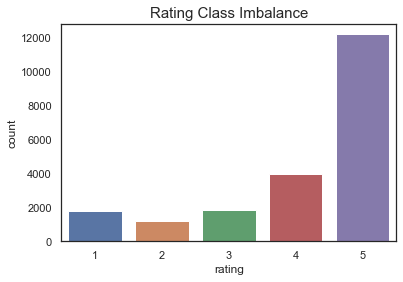

In [520]:
# What is the distribution of our ratings column?
sns.countplot(x='rating', data=df)
plt.title('Rating Class Imbalance', size=15)
print(df['rating'].value_counts())

1    16183
0    4817 
Name: sentiment, dtype: int64


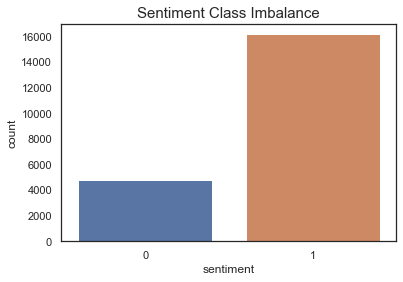

In [521]:
# What is the distribution of our sentiment column?

sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Class Imbalance', size=15)
print(df['sentiment'].value_counts())

1    10500
0    10500
Name: falsified, dtype: int64


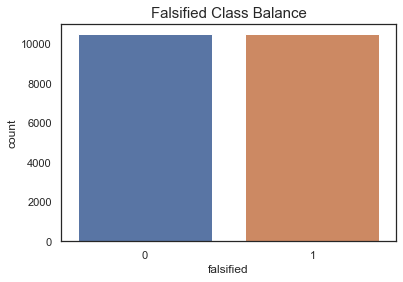

In [522]:
# What is the distribution of our falsified column?
sns.countplot(x='falsified', data=df)
plt.title('Falsified Class Balance', size=15)
print(df['falsified'].value_counts())

<b>WordCloud<b>

Another check we can preform is a wordcloud. This is helpful not only to see what are some of the most frequent words in the review_text column but we can also see if any html has remained from previous scraping.

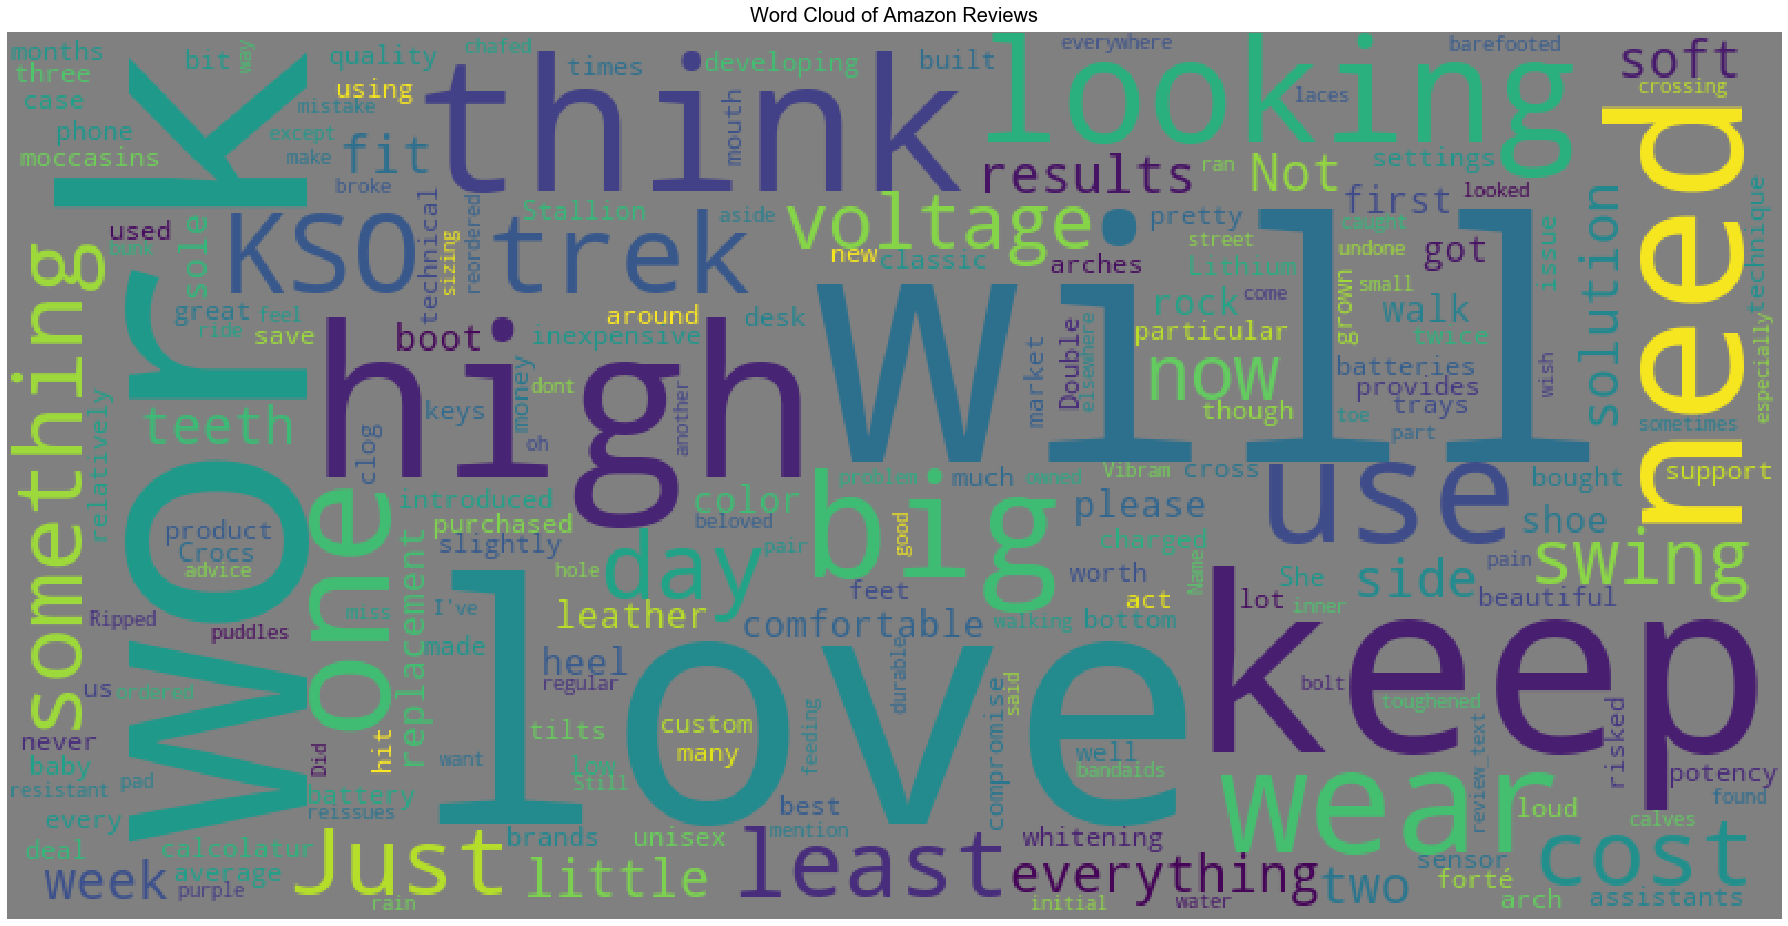

In [528]:
from wordcloud import WordCloud, STOPWORDS

def plot_wordcloud(text, mask=None, max_words=200, max_font_size=150, figure_size=(25.0,25.0), 
                   title = None, title_size=20, image_color=False):
    stopwords = set(STOPWORDS)

    wordcloud = WordCloud(background_color='gray',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 50,
                    width=800, 
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  
    
plot_wordcloud(df['review_text'], title="Word Cloud of Amazon Reviews")

In [525]:
# Let's clean out any html (should it exist)
import bs4
df['review_text'] = df['review_text'].apply(lambda x: bs4.BeautifulSoup(x, 'lxml').get_text())

In [529]:
df.head(2)

,doc_id,falsified,rating,verified_purchase,product_category,product_id,product_title,review_title,review_text,sentiment
0,1,1,4,0,PC,B00008NG7N,"Targus PAUK10U Ultra Mini USB Keypad, Black",useful,"When least you think so, this product will save the day. Just keep it around just in case you need it for something.",1
1,2,1,4,1,Wireless,B00LH0Y3NM,Note 3 Battery : Stalion Strength Replacement 3200mAh Li-Ion Battery for Samsung Galaxy Note 3 [24-Month Warranty] with NFC Chip + Google Wallet Capable,New era for batteries,Lithium batteries are something new introduced in the market there average developing cost is relatively high but Stallion doesn't compromise on quality and provides us with the best at a low cost.There are so many in built technical assistants that act like a sensor in their particular forté. The battery keeps my phone charged up and it works at every voltage and a high voltage is never risked.,1
2,3,1,3,0,Baby,B000I5UZ1Q,"Fisher-Price Papasan Cradle Swing, Starlight",doesn't swing very well.,"I purchased this swing for my baby. She is 6 months now and has pretty much out grown it. It is very loud and doesn't swing very well. It is beautiful though. I love the colors and it has a lot of settings, but I don't think it was worth the money.",0
3,4,1,4,0,Office Products,B003822IRA,Casio MS-80B Standard Function Desktop Calculator,Great computing!,I was looking for an inexpensive desk calcolatur and here it is. It works and does everything I need. Only issue is that it tilts slightly to one side so when I hit any keys it rocks a little bit. Not a big deal.,1
4,5,1,4,0,Beauty,B00PWSAXAM,Shine Whitening - Zero Peroxide Teeth Whitening System - No Sensitivity,Only use twice a week,"I only use it twice a week and the results are great. I have used other teeth whitening solutions and most of them, for the same results I would have to use it at least three times a week. Will keep using this because of the potency of the solution and also the technique of the trays, it keeps everything in my teeth, in my mouth.",1


In [530]:
df_clean = df

In [531]:
df = df_clean

### 3. Feature Extraction
---

Here we will begin to expand our review_text column into a few more features used later in analysis. We will be primarily be preforming basic math calculations but will utilize the textstat library along with Stanford CoreNLP package to perform some heavy lifting.

In [533]:
import string

## Number of words in the text ##
df["num_words_in_text"] = df["review_text"].apply(lambda x: len(str(x).split()))

## Number of stopwords in the text ##
df["num_stopwords"] = df["review_text"].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))

## Number of words in the text (not counting stopwords) ##
df["num_words_in_text_no_stop"] = df.apply(lambda x: x['num_words_in_text'] - x['num_stopwords'], axis=1)

## Number of unique words in the text ##
df["num_unique_words"] = df["review_text"].apply(lambda x: len(set(str(x).split())))

## Average length of the words in the text ##
df["mean_word_len"] = df["review_text"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

## Number of characters in the text ##
df["num_chars"] = df["review_text"].apply(lambda x: len(str(x)))

## Number of punctuations in the text ##
df["num_punctuations"] = df['review_text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

In [534]:
## Number of Scentences ##
df["num_scentences_in_text"] = df["review_text"].apply(lambda x: textstat.sentence_count(x))

## Flesch Reading Ease Formula ##
df["flesch_ease"] = df["review_text"].apply(lambda x: textstat.flesch_reading_ease(x))

## Flesh-Kincaid Grade Level ##
df["flesch_kincaid_grade"] = df["review_text"].apply(lambda x: textstat.flesch_kincaid_grade(x))

## Automated Readability Index ##
df["automated_readability_index"] = df["review_text"].apply(lambda x: textstat.automated_readability_index(x))

## Overall Readability Index ##
df["overall_readability_index"] = df["review_text"].apply(lambda x: textstat.text_standard(x, float_output=True))

In [558]:
# Sanity Check, let's see if everything looks as it should.
df.head(1)

,doc_id,falsified,rating,verified_purchase,product_category,product_id,product_title,review_title,review_text,sentiment,...,num_words_in_text_no_stop,num_unique_words,mean_word_len,num_chars,num_punctuations,num_scentences_in_text,flesch_ease,flesch_kincaid_grade,automated_readability_index,overall_readability_index
0,1,1,4,0,PC,B00008NG7N,"Targus PAUK10U Ultra Mini USB Keypad, Black",useful,"When least you think so, this product will save the day. Just keep it around just in case you need it for something.",1,...,12,21,4.09,116,3,2,102.10,1.90,3.60,5.00


In [559]:
#Let's see how our data looks and if there are any extremes in our data.
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
doc_id,21000.00,10500.50,6062.32,1.00,5250.75,10500.50,15750.25,21000.00
falsified,21000.00,0.50,0.50,0.00,0.00,0.50,1.00,1.00
rating,21000.00,4.13,1.28,1.00,4.00,5.00,5.00,5.00
verified_purchase,21000.00,0.56,0.50,0.00,0.00,1.00,1.00,1.00
sentiment,21000.00,0.77,0.42,0.00,1.00,1.00,1.00,1.00
num_words_in_text,21000.00,68.45,84.25,1.00,29.00,44.00,73.00,2805.00
num_stopwords,21000.00,34.00,40.97,0.00,14.00,23.00,37.00,1423.00
num_words_in_text_no_stop,21000.00,34.45,43.98,1.00,15.00,22.00,36.00,1382.00
num_unique_words,21000.00,51.27,46.06,1.00,26.00,38.00,57.00,992.00
mean_word_len,21000.00,4.35,0.73,3.09,4.06,4.30,4.58,64.00


- We can see that we have some extremly large reviews, let's truncate some of the reviews.

In [560]:
# Truncate some extreme values for better visuals, think about balancing positive vs negative reviews.
# 400 words is about 4 paragraphs. By 4 Paragraphs we should have the idea across.
df_final = df.query('num_words_in_text <= 500 and num_punctuations < 300')

In [561]:
#Sanity check. Let's make sure we've made a difference.
df_final.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
doc_id,20862.00,10488.65,6070.71,1.00,5226.25,10455.50,15754.75,21000.00
falsified,20862.00,0.50,0.50,0.00,0.00,1.00,1.00,1.00
rating,20862.00,4.13,1.28,1.00,4.00,5.00,5.00,5.00
verified_purchase,20862.00,0.56,0.50,0.00,0.00,1.00,1.00,1.00
sentiment,20862.00,0.77,0.42,0.00,1.00,1.00,1.00,1.00
num_words_in_text,20862.00,64.05,60.61,1.00,29.00,44.00,72.00,500.00
num_stopwords,20862.00,31.94,30.20,0.00,14.00,22.00,37.00,255.00
num_words_in_text_no_stop,20862.00,32.12,31.14,1.00,15.00,22.00,35.00,339.00
num_unique_words,20862.00,49.09,36.55,1.00,26.00,38.00,57.00,319.00
mean_word_len,20862.00,4.35,0.73,3.09,4.06,4.30,4.57,64.00


<b>Total Sentence Sentiment and Stanford NLP<b>

---

Next up, we'll be utilizing Stanford CoreNLP to preform per sentence sentiment and then calculate the weighted sum of the sentiment. The system is 87.6% accurate at predicting the sentiment of a scentence.

In [583]:
from pycorenlp import StanfordCoreNLP

i = 0

def total_sentiment(text):
    global i
    
    n1=0
    n2=0
    n3=0
    n4=0
    n5=0

    nlp = StanfordCoreNLP('http://localhost:9000')

    results = nlp.annotate(text,properties={
            'annotators':'sentiment, ner, pos',
            'outputFormat': 'json',
            'timeout': 50000,
            })

    for s in results["sentences"]:
        if(s["sentiment"] == 'Very Negative'):
            n1+=1
        elif(s["sentiment"] == 'Negative'):
            n2+=1
        elif(s["sentiment"] == 'Neutral'):
            n3+=1
        elif(s["sentiment"] == 'Positive'):
            n4+=1
        else:
            n5+=1

        total_sentiment = 1*n1 + 2*n2 + 3*n3 + 4*n4 + 5*n5

#         print(s["sentiment"])

    i = i +1
    print(f'{21000/i}% Complete...', end='\r')
    print(f'Finished the {i} total_sentiment with value {total_sentiment}...', end='\r')
    
    return(total_sentiment)



In [585]:
def get_sentence_catch(x):
    try:
        total_sentiment(x)
    except: 
        pass

In [ ]:
## Number of words in the text ##
df_final["total_sentiment"] = df_final["review_text"].apply(lambda x: get_sentence_catch(x))

In [540]:
df_final.to_csv('df_final.csv');

- Let's get a baseline to see how a dummy classifier would score.

In [542]:
from sklearn.dummy import DummyClassifier

# Separate input features and target
y = df_final['falsified']
X = df_final.drop(columns='falsified', axis=1)

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

# DummyClassifier to predict only target 0
dummy = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
dummy_pred = dummy.predict(X_test)

# checking unique labels
print('Unique predicted labels: ', (np.unique(dummy_pred)))

# checking accuracy
print('Test score: ', accuracy_score(y_test, dummy_pred))

Unique predicted labels:  [1]
Test score:  0.5011503067484663


### 4. Corrolation Check and VIF Check

In [543]:
df_numerical = df[['falsified','rating','verified_purchase','sentiment','num_words_in_text','num_stopwords',\
                  'num_words_in_text_no_stop', 'num_unique_words', 'mean_word_len','num_chars',\
                  'num_punctuations','num_scentences_in_text', 'flesch_ease', 'flesch_kincaid_grade',\
                  'automated_readability_index','overall_readability_index']]

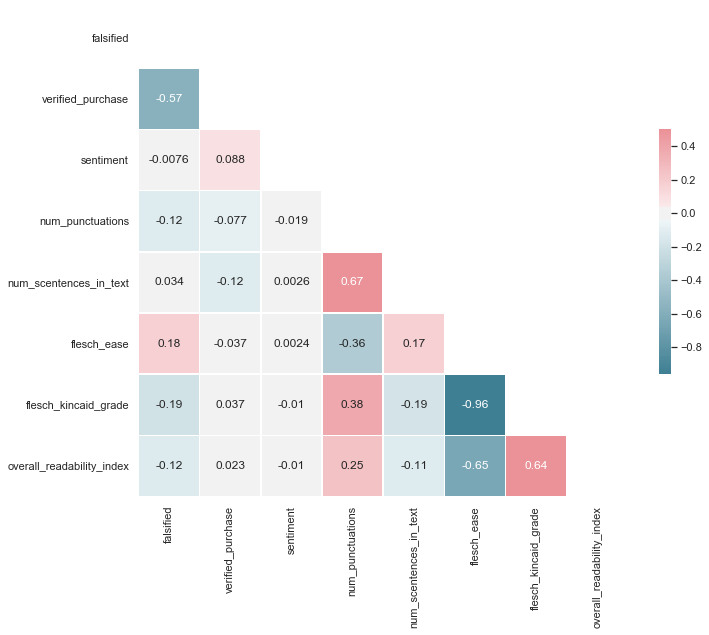

In [544]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#df_corr = df_numerical
df_corr = low_vif_df_numerical

sns.set(style="white")

# Compute the correlation matrix
corr = df_corr.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.5, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=corr)

In [545]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

vif_df_numerical = df_numerical

#Lets take a look at the Varience Inflation Factor on ONLY low corrolated columns
VIF = []

vif_df_numerical = vif_df_numerical.drop('num_words_in_text', axis=1)
vif_df_numerical = vif_df_numerical.drop('num_stopwords', axis=1)
vif_df_numerical = vif_df_numerical.drop('num_words_in_text_no_stop', axis=1)
vif_df_numerical = vif_df_numerical.drop('automated_readability_index', axis=1)
vif_df_numerical = vif_df_numerical.drop('num_unique_words', axis=1)
vif_df_numerical = vif_df_numerical.drop('mean_word_len', axis=1)
vif_df_numerical = vif_df_numerical.drop('rating', axis=1)
vif_df_numerical = vif_df_numerical.drop('num_chars', axis=1)

for i in vif_df_numerical:
    X = vif_df_numerical[[
        'falsified',
        #'rating',
        'verified_purchase',
        'sentiment',
        #'num_words_in_text',
        #'num_stopwords',
        #'num_words_in_text_no_stop', 
        #'num_unique_words', 
        #'mean_word_len',
        #'num_chars',
        'num_punctuations',
        'num_scentences_in_text', 
        'flesch_ease', 
        'flesch_kincaid_grade',
        #'automated_readability_index',
        'overall_readability_index'
        ]]
    
    low_vif_df_numerical = X
    y = vif_df_numerical['sentiment']
    
    X_withconst = sm.add_constant(X)
    
    #Lets store our results
    VIF = pd.Series([variance_inflation_factor(X.values, i) 
        for i in range(X.shape[1])],index=X.columns)
    
    #Lets make a pretty table to show our results
    pd.options.display.float_format = '{:.2f}'.format
    
VIF_Frame = pd.DataFrame(VIF, columns=['VIF Value'])

VIF_Frame

,VIF Value
falsified,2.97
verified_purchase,3.29
sentiment,4.23
num_punctuations,5.06
num_scentences_in_text,5.79
flesch_ease,6.93
flesch_kincaid_grade,5.25
overall_readability_index,2.88


### 5. Preliminary Modeling

In [546]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [547]:
print(df.columns)

Index(['doc_id', 'falsified', 'rating', 'verified_purchase',
       'product_category', 'product_id', 'product_title', 'review_title',
       'review_text', 'sentiment', 'num_words_in_text', 'num_stopwords',
       'num_words_in_text_no_stop', 'num_unique_words', 'mean_word_len',
       'num_chars', 'num_punctuations', 'num_scentences_in_text',
       'flesch_ease', 'flesch_kincaid_grade', 'automated_readability_index',
       'overall_readability_index'],
      dtype='object')


In [548]:
y = low_vif_df_numerical['falsified']
X = low_vif_df_numerical.drop(columns='falsified')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print(y.shape)
print(X.shape)

(21000,)
(21000, 7)


In [549]:
X_withconstant = sm.add_constant(X)

my_logit_results = sm.Logit(y, X_withconstant).fit()
my_logit_results.summary()

Optimization terminated successfully.
         Current function value: 0.481039
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              falsified   No. Observations:                21000
Model:                          Logit   Df Residuals:                    20992
Method:                           MLE   Df Model:                            7
Date:                Fri, 19 Jun 2020   Pseudo R-squ.:                  0.3060
Time:                        20:30:06   Log-Likelihood:                -10102.
converged:                       True   LL-Null:                       -14556.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         2.7099      0.190     14.275      0.000       2.338       3.082
verified_purchase            -2.8852      0.038    -75.173      0.000      -2.960      -2.810
sentiment                     0.2962      0.043      6.866      0.000       0.212       0.381
num_punctuations             -0.0433      0.003    -14.991      0.000      -0.049      -0.038
num_scentences_in_text        0.0628      0.010      6.106      0.000       0.043       0.083
flesch_ease                  -0.0071      0.002     -3.991      0.000      -0.011      -0.004
flesch_kincaid_grade         -0.0530      0.006     -9.259      0.000      -0.064      -0.042
overall_readability_index    -0.0035      0.004     -0.953      0.341      -0.011       0.004
=============================================================================================
"""

### 6. Class Imbalance + Downsampling DF

1    16183
0    4817 
Name: sentiment, dtype: int64


Text(0.5, 1.0, 'Sentiment Counts')

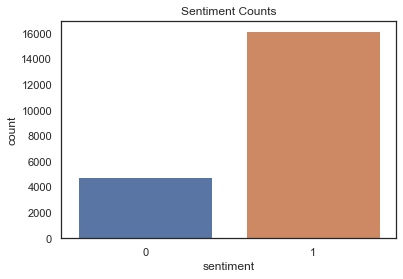

In [550]:
print(low_vif_df_numerical['sentiment'].value_counts())
sns.countplot(x='sentiment', data=low_vif_df_numerical)
plt.title("Sentiment Counts")

In [551]:
1-4817/16183

0.7023419637891615

In [552]:
from sklearn.utils import resample

positive = low_vif_df_numerical[low_vif_df_numerical['sentiment']==1]
negative = low_vif_df_numerical[low_vif_df_numerical['sentiment']==0]

positive_downsampled = resample(positive,
                                replace = False, # sample without replacement
                                n_samples = len(negative), # match minority n
                                random_state = 27) # reproducible results

# combine minority and downsampled majority
downsampled = pd.concat([positive_downsampled, negative])

df_downsampled = downsampled

1    4817
0    4817
Name: sentiment, dtype: int64


Text(0.5, 1.0, 'Sentiment Counts')

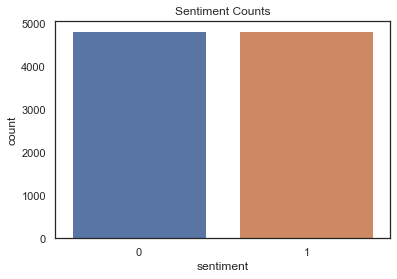

In [553]:
print(df_downsampled['sentiment'].value_counts())
sns.countplot(x='sentiment', data=df_downsampled)
plt.title("Sentiment Counts")

In [557]:
df_downsampled.head()

,falsified,verified_purchase,sentiment,num_punctuations,num_scentences_in_text,flesch_ease,flesch_kincaid_grade,overall_readability_index
7079,1,0,1,5,1,41.71,18.90,19.00
14253,0,1,1,6,1,58.29,14.60,5.00
17870,0,1,1,2,2,92.12,3.60,5.00
6945,1,0,1,0,1,73.85,10.70,7.00
20646,0,1,1,3,1,58.96,12.20,5.00


KeyError: 'review_text'

In [ ]:
df_downsampled.to_csv('df_final.csv');

### 7. Clustering

In [346]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [483]:
# tSNE with two components
y = df_downsampled['falsified']
X = df_downsampled.drop(columns='falsified', axis=1)

# y = df_final['falsified']
# X = df_final.drop(columns='falsified', axis=1)

# We need to scale the data since tSNE is also distance based
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

my_tSNE = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)

X_tSNE = my_tSNE.fit_transform(X_scaled)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 9634 samples in 0.008s...
[t-SNE] Computed neighbors for 9634 samples in 0.595s...
[t-SNE] Computed conditional probabilities for sample 1000 / 9634
[t-SNE] Computed conditional probabilities for sample 2000 / 9634
[t-SNE] Computed conditional probabilities for sample 3000 / 9634
[t-SNE] Computed conditional probabilities for sample 4000 / 9634
[t-SNE] Computed conditional probabilities for sample 5000 / 9634
[t-SNE] Computed conditional probabilities for sample 6000 / 9634
[t-SNE] Computed conditional probabilities for sample 7000 / 9634
[t-SNE] Computed conditional probabilities for sample 8000 / 9634
[t-SNE] Computed conditional probabilities for sample 9000 / 9634
[t-SNE] Computed conditional probabilities for sample 9634 / 9634
[t-SNE] Mean sigma: 0.146357
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.132141
[t-SNE] KL divergence after 300 iterations: 2.061700


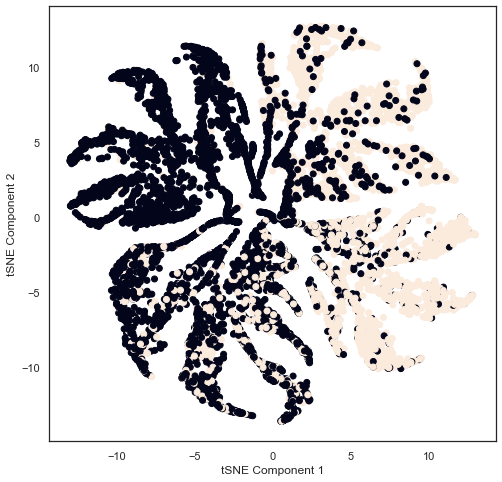

In [484]:
# Plotting the tSNE-transformed data (only the first two dimensions)
plt.figure(figsize=(8, 8))
plt.scatter(X_tSNE[:,0],X_tSNE[:,1],c=y)

plt.xlabel("tSNE Component 1")
plt.ylabel("tSNE Component 2")

plt.show()

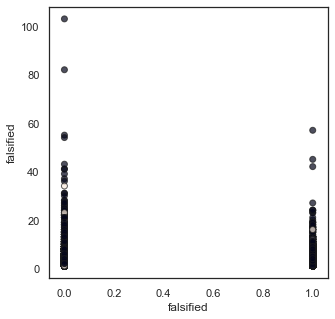

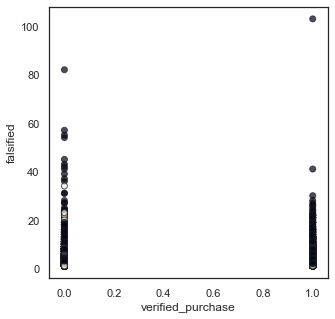

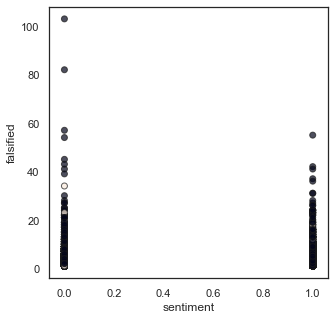

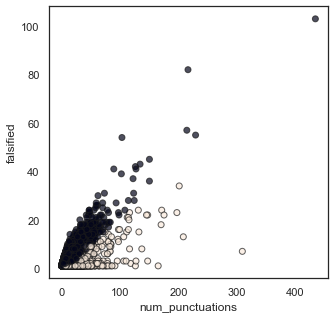

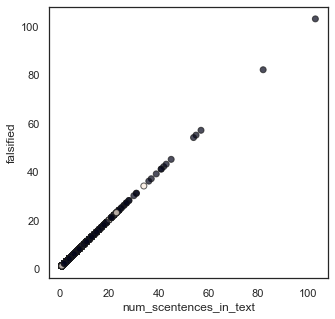

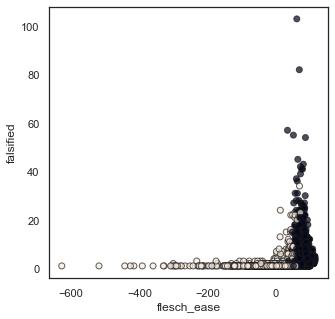

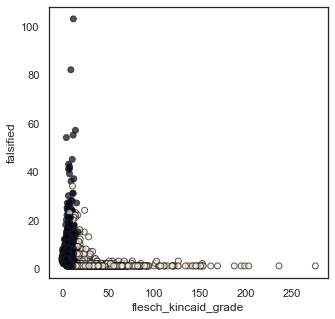

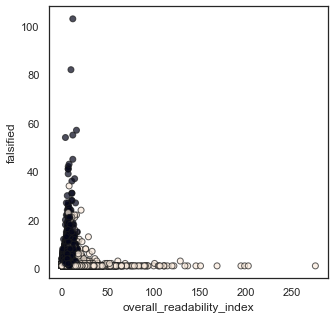

In [349]:
from sklearn.mixture import GaussianMixture

X = df_downsampled
y = df_downsampled['falsified']

#Build and fit the model
my_gmm = GaussianMixture(n_components=2, covariance_type='full')
my_gmm.fit(X)

#Getting the labels
pred_labels_gmm = my_gmm.predict(X)

for column in df_downsampled:
    #Plot the predictions
    plt.figure(figsize=[5,5])
    plt.scatter(x = df_downsampled[column],
                y = df_downsampled['num_scentences_in_text'],
                c=pred_labels_gmm, 
                edgecolor='k',
                alpha=0.7)
    plt.xlabel(column)
    plt.ylabel('falsified')
    plt.show();

### 8. Model Selection & Detailed Data Modeling

In [387]:
y = df_downsampled['falsified']
X = df_downsampled.drop(columns='falsified')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print(y.shape)
print(X.shape)

(9634,)
(9634, 7)


In [351]:
X_withconstant = sm.add_constant(X)

my_logit_results = sm.Logit(y, X_withconstant).fit()
my_logit_results.summary()

Optimization terminated successfully.
         Current function value: 0.456106
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              falsified   No. Observations:                 9634
Model:                          Logit   Df Residuals:                     9626
Method:                           MLE   Df Model:                            7
Date:                Fri, 19 Jun 2020   Pseudo R-squ.:                  0.3420
Time:                        09:31:18   Log-Likelihood:                -4394.1
converged:                       True   LL-Null:                       -6677.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         3.0000      0.384      7.821      0.000       2.248       3.752
verified_purchase            -3.1019      0.058    -53.698      0.000      -3.215      -2.989
sentiment                     0.3251      0.055      5.912      0.000       0.217       0.433
num_punctuations             -0.0343      0.004     -8.207      0.000      -0.042      -0.026
num_scentences_in_text        0.0222      0.016      1.411      0.158      -0.009       0.053
flesch_ease                  -0.0076      0.004     -2.006      0.045      -0.015      -0.000
flesch_kincaid_grade         -0.0576      0.011     -5.204      0.000      -0.079      -0.036
overall_readability_index    -0.0097      0.006     -1.729      0.084      -0.021       0.001
=============================================================================================
"""

In [366]:
coefficients = my_logit_results.params
coefficients.head()

const                     3.00
verified_purchase        -3.10
sentiment                 0.33
num_punctuations         -0.03
num_scentences_in_text    0.02
dtype: float64

In [367]:
p_values = my_logit_results.pvalues
p_values.head()

const                    0.00
verified_purchase        0.00
sentiment                0.00
num_punctuations         0.00
num_scentences_in_text   0.16
dtype: float64

In [368]:
coefficient_df = pd.DataFrame({"coefficient": coefficients,
                               "p-value": p_values})
print(coefficient_df.shape)
coefficient_df.head()

(8, 2)


,coefficient,p-value
const,3.00,0.00
verified_purchase,-3.10,0.00
sentiment,0.33,0.00
num_punctuations,-0.03,0.00
num_scentences_in_text,0.02,0.16


In [369]:
coefficient_df.drop('const', axis=0, inplace=True)
coefficient_df.head()

,coefficient,p-value
verified_purchase,-3.10,0.00
sentiment,0.33,0.00
num_punctuations,-0.03,0.00
num_scentences_in_text,0.02,0.16
flesch_ease,-0.01,0.04


In [370]:
statistically_significant_condition = coefficient_df['p-value'] < 0.05

significant_coefficient_df = coefficient_df.loc[statistically_significant_condition].copy()
significant_coefficient_df.shape

(5, 2)

In [371]:
significant_coefficient_df['abs_coef'] = np.abs(significant_coefficient_df['coefficient'])
significant_coefficient_df = significant_coefficient_df.sort_values(by='abs_coef')
significant_coefficient_df

,coefficient,p-value,abs_coef
flesch_ease,-0.01,0.04,0.01
num_punctuations,-0.03,0.00,0.03
flesch_kincaid_grade,-0.06,0.00,0.06
sentiment,0.33,0.00,0.33
verified_purchase,-3.10,0.00,3.10


In [372]:
significant_coefficient_df['color'] = np.where(significant_coefficient_df['coefficient'] >= 0.0,
                                               'blue', 
                                               'red')
significant_coefficient_df.head()

,coefficient,p-value,abs_coef,color
flesch_ease,-0.01,0.04,0.01,red
num_punctuations,-0.03,0.00,0.03,red
flesch_kincaid_grade,-0.06,0.00,0.06,red
sentiment,0.33,0.00,0.33,blue
verified_purchase,-3.10,0.00,3.10,red


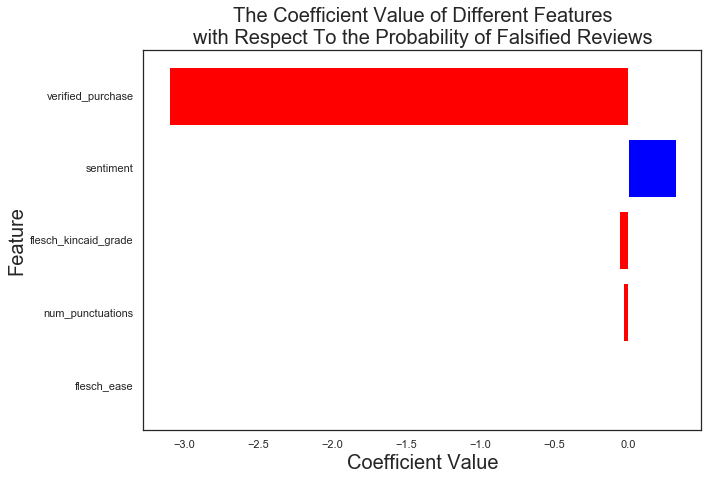

In [384]:
plt.figure(figsize=(10,7))
plt.barh(significant_coefficient_df.index, 
         significant_coefficient_df['coefficient'],
         color=significant_coefficient_df['color'])
plt.title("The Coefficient Value of Different Features\nwith Respect To the Probability of Falsified Reviews",
          size=20)
plt.xlabel("Coefficient Value", size=20)
plt.ylabel("Feature", size=20)
plt.show()

In [385]:
significant_coefficient_df['odds_increase'] = np.where(significant_coefficient_df['coefficient'] > 0,
                                                       np.exp(significant_coefficient_df['coefficient']),
                                                       np.exp(-significant_coefficient_df['coefficient']))
significant_coefficient_df.head() 

,coefficient,p-value,abs_coef,color,odds_increase
flesch_ease,-0.01,0.04,0.01,red,1.01
num_punctuations,-0.03,0.00,0.03,red,1.03
flesch_kincaid_grade,-0.06,0.00,0.06,red,1.06
sentiment,0.33,0.00,0.33,blue,1.38
verified_purchase,-3.10,0.00,3.10,red,22.24


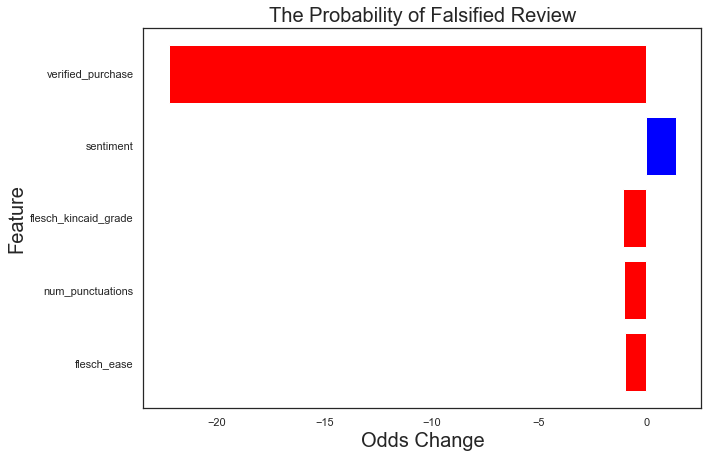

In [386]:
significant_coefficient_df['odds_increase'] = np.where(significant_coefficient_df['coefficient'] > 0,
                                                       significant_coefficient_df['odds_increase'],
                                                       -significant_coefficient_df['odds_increase'])


plt.figure(figsize=(10,7))
plt.barh(significant_coefficient_df.index, 
         significant_coefficient_df['odds_increase'],
         color=significant_coefficient_df['color'])
plt.title("The Probability of Falsified Review",
          size=20)
plt.xlabel("Odds Change", size=20)
plt.ylabel("Feature", size=20)
plt.show()

#### Logistic Regression

In [476]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#Set up X and y
X = df_downsampled.drop('falsified', axis=1)
y = df_downsampled['falsified']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_remainder, X_test, y_remainder, y_test = train_test_split(X, 
                                                            y, 
                                                            test_size = 0.2, 
                                                            stratify = y,
                                                            random_state=1)

In [407]:
#Baseline LogReg Model
logreg_model = LogisticRegression(penalty='l2', max_iter=10000)
logreg_model.fit(X_train, y_train)

#Score it
train_prediction = logreg_model.predict(X_train)
test_prediction = logreg_model.predict(X_test)

accuracy_train = accuracy_score(train_prediction, y_train)
accuracy_test = accuracy_score(test_prediction, y_test)

print(f"Score on training set: {accuracy_train}")
print(f"Score on test set: {accuracy_test}")

#PlotBoundaries(logreg_model, X, y, plotsize=(10,7))

Score on training set: 0.8134163747242766
Score on test set: 0.8162947586922678


- Now that we have a baseline, let's see if we can optimize the hyperparameter C using cross validation.

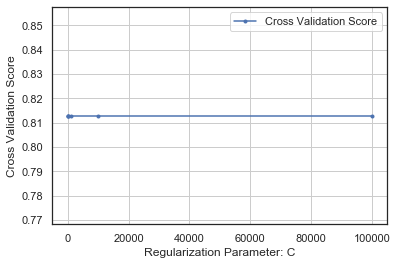

In [414]:
# Store the results
cross_validation_scores = []

# Define max_depth range
max_C_range = list([1, 10, 100, 1000, 10000, 100000])

#Do some cross validation
for c in max_C_range:
    LogReg_model2 = LogisticRegression(C=c, random_state=1, max_iter=10000)
    cv_score = np.mean(cross_val_score(LogReg_model2, X_remainder, y_remainder, cv = 5))
    cross_validation_scores.append(cv_score)

plt.figure()
plt.plot(max_C_range, cross_validation_scores,label="Cross Validation Score",marker='.')
plt.legend()
plt.xlabel('Regularization Parameter: C')
plt.ylabel('Cross Validation Score')
plt.grid()
plt.show();

In [ ]:
# Getting our optimal max depth value
max_depth_range[np.argmax(cross_validation_scores)]

#### K-Nearest Neighbors

In [454]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate the model & fit it to our data
KNN_model = KNeighborsClassifier(n_neighbors=5, weights='distance')
KNN_model.fit(X_train, y_train)

# Score the model on the test set
train_predictions = KNN_model.predict(X_train)
test_predictions = KNN_model.predict(X_test)

train_accuracy = accuracy_score(train_predictions, y_train)
test_accuracy = accuracy_score(test_predictions, y_test)

print(f"Train set accuracy: {train_accuracy}")
print(f"Test set accuracy: {test_accuracy}")

Train set accuracy: 0.9900090826521344
Test set accuracy: 0.9366891541255838


In [442]:
# Define hyperparameters to search over
dt_params = { 'n_neighbors':list(range(1,15)), 
              'leaf_size': list(range(1,15)),
              'weights': list(['uniform','distance']),
              'algorithm': list(['auto', 'ball_tree', 'kd_tree', 'brute'])
            }

In [443]:
# Initiate the DT grid search
gs_knnmodel = GridSearchCV(estimator=KNeighborsClassifier(), \
                          param_grid=dt_params, cv=5, n_jobs=-1, verbose=0)

# Fit the DT grid search
gs_knnmodel_fitted = gs_knnmodel.fit(X_remainder, y_remainder)

In [444]:
# Show the best estimators
gs_knnmodel_fitted.best_params_

{'algorithm': 'ball_tree',
 'leaf_size': 2,
 'n_neighbors': 6,
 'weights': 'uniform'}

In [445]:
# Let's see if our accuracy improved
print(gs_knnmodel_fitted.score(X_remainder, y_remainder))
print(gs_knnmodel_fitted.score(X_test, y_test))

0.7739717140262099
0.6886351842241827


In [ ]:
accuracy_score(y_test, rfc_pred)

In [ ]:
f1_score(y_test, rfc_pred)

In [ ]:
recall_score(y_test, rfc_pred)

#### Decision Tree
- Decision trees work well with imbalanced data.
- <mark>"How" each model makes decions (decisions trees at each nodes)<mark>

In [470]:
from sklearn.tree import DecisionTreeClassifier

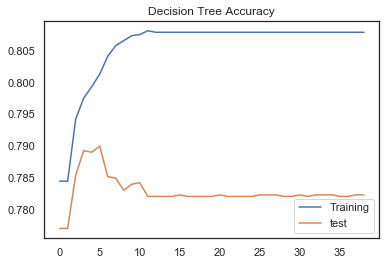

In [471]:
training_scores = []
test_scores = []

for i in range(1,40):
    # Instantiate & fit the DT
    DT_model = DecisionTreeClassifier(max_depth=i, max_leaf_nodes=100)
    DT_model.fit(X_train, y_train)
    
    training_scores.append(DT_model.score(X_train, y_train))
    test_scores.append(DT_model.score(X_test, y_test))

plt.figure()
plt.title('Decision Tree Accuracy')
plt.plot(training_scores)
plt.plot(test_scores)
plt.legend(['Training', 'test'])

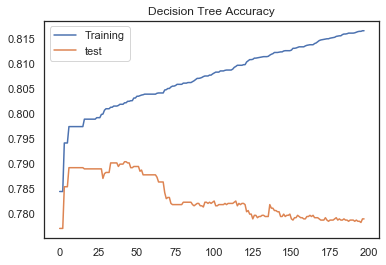

In [472]:
training_scores = []
test_scores = []

for i in range(2,200):
    # Instantiate & fit the DT
    DT_model = DecisionTreeClassifier(max_depth=19, max_leaf_nodes=i)
    DT_model.fit(X_train, y_train)
    
    training_scores.append(DT_model.score(X_train, y_train))
    test_scores.append(DT_model.score(X_test, y_test))

plt.figure()
plt.title('Decision Tree Accuracy')
plt.plot(training_scores)
plt.plot(test_scores)
plt.legend(['Training', 'test'])

In [473]:
# Instantiate & fit the DT
DT_model = DecisionTreeClassifier(max_depth = 4, max_leaf_nodes=14)
DT_model.fit(X_train, y_train) 

# Evaluate its classification accuracy (Just on the training set for now)
print(f"DT training set accuracy: {DT_model.score(X_train, y_train)}")
print(f"DT test set accuracy: {DT_model.score(X_test, y_test)}")

DT training set accuracy: 0.7975
DT test set accuracy: 0.7892857142857143


- Now that we have an optimized Decision Tree, let's see a grid search can conclude our results.

In [416]:
# Define hyperparameters to search over
dt_params = { 'max_depth':list(range(1,11)), 
              'min_samples_leaf': list(range(1,11)),
              'max_leaf_nodes': list(range(1,20))}

In [417]:
# Initiate the DT grid search
gs_dtmodel = GridSearchCV(estimator=DecisionTreeClassifier(random_state = 1), \
                          param_grid=dt_params, cv=5, n_jobs=-1, verbose=0)

# Fit the DT grid search
gs_dtmodel_fitted = gs_dtmodel.fit(X_remainder, y_remainder)

In [418]:
# Show the best estimators
gs_dtmodel_fitted.best_params_

{'max_depth': 6, 'max_leaf_nodes': 16, 'min_samples_leaf': 1}

In [419]:
# Let's see if our accuracy improved
print(gs_dtmodel_fitted.score(X_remainder, y_remainder))
print(gs_dtmodel_fitted.score(X_test, y_test))

0.8180874529648372
0.815256875973015


In [455]:
# Instantiate & fit the DT
DT_model = DecisionTreeClassifier(max_depth = 6, max_leaf_nodes=16, min_samples_leaf=1)
DT_model.fit(X_train, y_train) 

# Evaluate its classification accuracy (Just on the training set for now)
print(f"DT training set accuracy: {DT_model.score(X_train, y_train)}")
print(f"DT test set accuracy: {DT_model.score(X_test, y_test)}")

DT training set accuracy: 0.8184767094848838
DT test set accuracy: 0.8230409963674105


#### Random Forest Classifier

In [477]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

# train model
rfc = RandomForestClassifier(n_estimators=10).fit(X_train, y_train)

# predict on test set
rfc_pred = rfc.predict(X_test)

In [478]:
accuracy_score(y_test, rfc_pred)

0.9491437467566165

In [479]:
f1_score(y_test, rfc_pred)

0.9489583333333333

In [480]:
recall_score(y_test, rfc_pred)

0.9420889348500517

- Lets see if we can optimize a few hyper parameters

In [489]:
# Define hyperparameters to search over
rfc_params = { 'n_estimators':list(range(1,100)), 
               'min_samples_split': list(range(1,10)),
               'min_samples_leaf':list(range(1,10)), 
               'min_weight_fraction_leaf':list(range(1,11)), 
               'max_leaf_nodes':list(range(1,11)) }

# n_estimators=100,
#     criterion='gini',
#     max_depth=None,
#     min_samples_split=2,
#     min_samples_leaf=1,
#     min_weight_fraction_leaf=0.0,
#     max_features='auto',
#     max_leaf_nodes=None,
#     min_impurity_decrease=0.0,
#     min_impurity_split=None,
#     bootstrap=True,
#     oob_score=False,
#     n_jobs=None,
#     random_state=None,
#     verbose=0,
#     warm_start=False,
#     class_weight=None,
#     ccp_alpha=0.0,
#     max_samples=None,

In [491]:
# Initiate the DT grid search
rfc2 = GridSearchCV(estimator=RandomForestClassifier(random_state = 1), \
                          param_grid=rfc_params, cv=5, n_jobs=-1, verbose=0)

# Fit the DT grid search
gs_rfcmodel_fitted = rfc2.fit(X_remainder, y_remainder)

In [ ]:
# Show the best estimators
gs_rfcmodel_fitted.best_params_

In [ ]:
# Let's see if our accuracy improved
print(gs_rfcmodel_fitted.score(X_remainder, y_remainder))
print(gs_rfcmodel_fitted.score(X_test, y_test))

#### Support Vector Machines

In [420]:
from sklearn.svm import LinearSVC

SVM_model = LinearSVC(max_iter=10000)
SVM_model.fit(X_train, y_train)

print(f"The TRAIN classification accuracy is: {SVM_model.score(X_train,y_train)}")
print(f"The TEST classification accuracy is: {SVM_model.score(X_test,y_test)}")

The TRAIN classification accuracy is: 0.8149734008044635
The TEST classification accuracy is: 0.8183705241307733


/Users/davepenny/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [421]:
from sklearn.svm import SVC

my_RBF_kernel_SVM = SVC()
my_linear_kernel_SVM = SVC(kernel='linear')

#Fit the data
my_linear_kernel_SVM.fit(X_train, y_train)

#Get the score
print(f"Linear SVM score (train): {my_linear_kernel_SVM.score(X_train,y_train)}")
print(f"Linear SVM score (test): {my_linear_kernel_SVM.score(X_test,y_test)}")

Linear SVM score (train): 0.8060205008433892
Linear SVM score (test): 0.807991696938246


### 9. Model Tuning and Selection

In [422]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [423]:
X_remainder, X_test, y_remainder, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=1)

In [424]:
my_pipeline = Pipeline([('scalar', StandardScaler()), ('dim_reducer', PCA()), ('model', DecisionTreeClassifier)])

In [425]:
# Parameter grid 
dt_params2 = [
    
    #without PCA 
    {'scalar': [None], 
    'dim_reducer' : [None],
    'model' : [DecisionTreeClassifier(random_state = 1)], 
    'model__max_depth' : list(range(1,11))},
               
    #with PCA 
    {'scalar' : [StandardScaler(), MinMaxScaler()],
    'dim_reducer' : [PCA()],
    'dim_reducer__n_components' : [.95,0.90,.85,0.8],
    'model' : [DecisionTreeClassifier(random_state=1)],
    'model__max_depth' : list(range(1,11))}
]

In [426]:
gs_dtmodel2 = GridSearchCV(my_pipeline, param_grid = dt_params2, cv = 5)

In [427]:
gs_dtmodels2_fitted = gs_dtmodel2.fit(X_remainder, y_remainder)

In [428]:
gs_dtmodels2_fitted.best_params_

{'dim_reducer': None,
 'model': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=4, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=1, splitter='best'),
 'model__max_depth': 4,
 'scalar': None}

In [429]:
print(gs_dtmodels2_fitted.score( X_remainder, y_remainder))
print(gs_dtmodels2_fitted.score( X_test, y_test))

0.818346957311535
0.815256875973015
